In [1]:
from keras.models import load_model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from matplotlib.pyplot import imshow
from scipy.interpolate import interp1d

# Set Parameters

In [2]:
# Folder containing dataset
data_path = r"D:\Downloads\cats-faces-64x64-for-generative-models\cats"

# File path to trained model from PCA GAN Training script
model_path = "model.h5"

# Folder where you want to save generated predictions of the trained model
save_path = r"C:\Users\Vee\Desktop\python\GAN\pca_new\walk"

# Boolean flag, set to True if the data has pngs to remove alpha layer from images
png = False

# Load Trained Generator

In [3]:
model = load_model(model_path)

C:\Users\Vee\Anaconda3\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


# Prepare X_Train Dataset for Inference

In [4]:
# Initializing arrays for data and image file paths
data = []
paths = []

# Get the file paths of all jpg files in this folder
for r, d, f in os.walk(data_path):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

# For each file add it to the data array
for path in paths:
    img = np.array(Image.open(path))

    # Remove alpha layer if imgaes are PNG
    if(png):
        img = img[...,:3]

    data.append(img)

#Reshaping data to be two dimensional for Principal Component Analysis
img_vector = np.array(data).reshape(len(data), 12288)/255

#Keep the first 512 eigenvectors of the covariance matrix of the img_vector
pca = PCA(n_components=512).fit(img_vector)
pca_data = pca.transform(img_vector)

# Reshape X_train to two dimensions
x_train = pca_data.reshape(len(pca_data), 512)

# Get Random Element Of X_Train Dataset

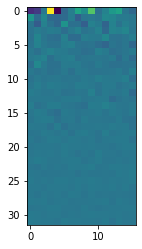

In [5]:
x_1 = x_train[(int)(np.random.rand()*len(x_train))].reshape(1,512)
imshow(x_1.reshape(32,16))

# Generate Prediction From Random Element Of X_Train Dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


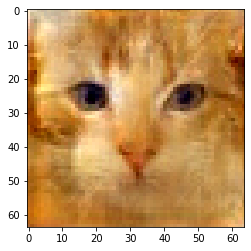

In [6]:
result = np.array(model.predict(x_1))
result = result.reshape(1,64,64,3)
result = result*255
result = result.astype(int)
imshow(result[0])

# Get Random Element Of X_Train Dataset

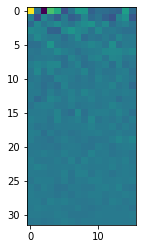

In [18]:
x_2 = x_train[(int)(np.random.rand()*len(x_train))].reshape(1,512)
imshow(x_2.reshape(32,16))

# Generate Prediction From Random Element Of X_Train Dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


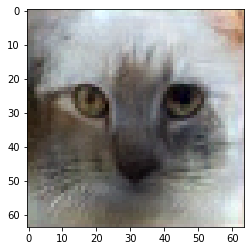

In [19]:
result2 = np.array(model.predict(x_2))
result2 = result2.reshape(1,64,64,3)
result2 = result2*255
result2 = result2.astype(int)
imshow(result2[0])

# Select X_Train Points to Interpolate

In [20]:
# Create placeholder array for X_train datapoints
data_points = []

In [21]:
# Add first data point to data_points array
data_points.append(x_1)

In [22]:
# Add second data point to data_points array
data_points.append(x_2)

In [23]:
# Add the first element of array as last element of the array (this will create a perfect loop in the interpolation)
data_points.append(data_points[0])

# Interpolate Points in Latent Space of Generator

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Vee\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with 

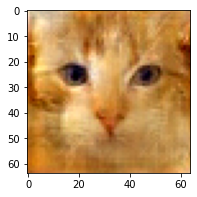

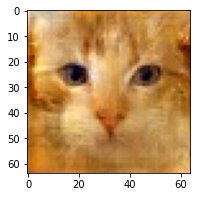

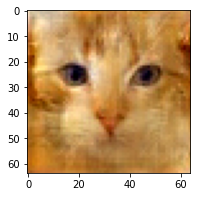

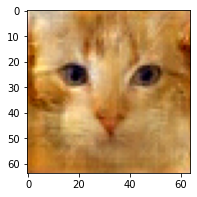

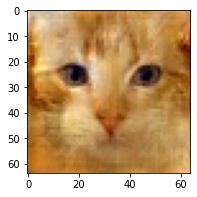

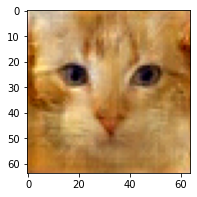

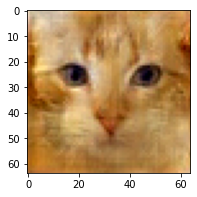

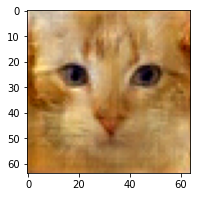

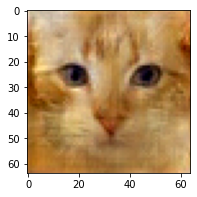

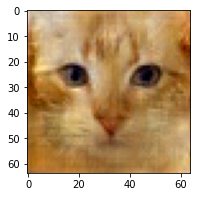

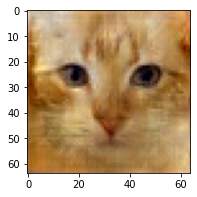

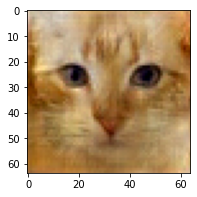

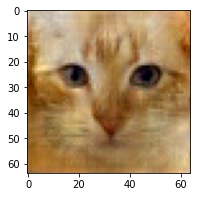

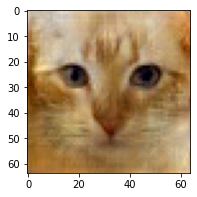

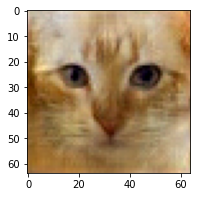

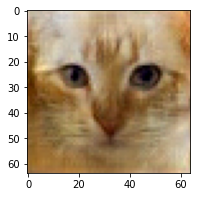

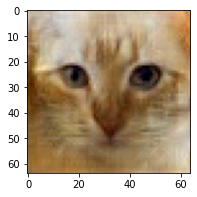

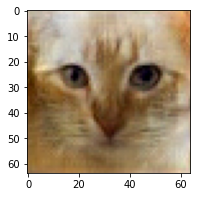

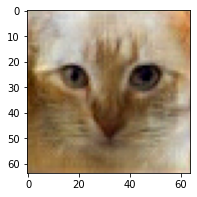

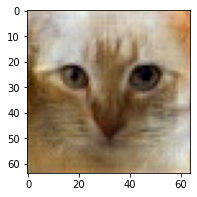

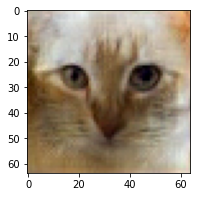

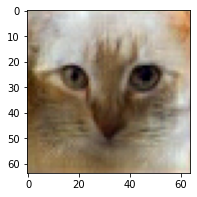

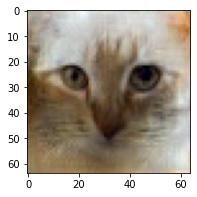

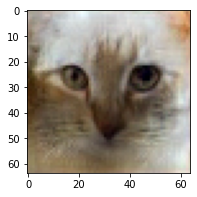

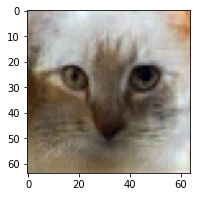

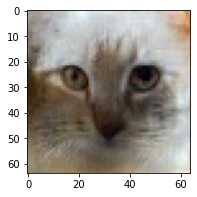

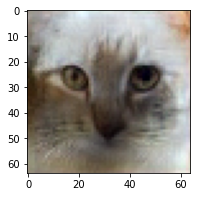

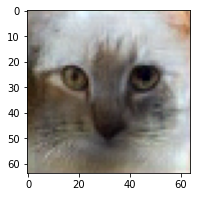

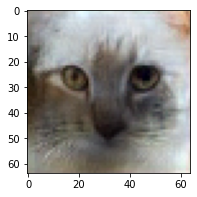

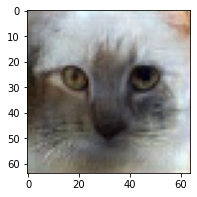

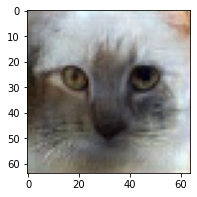

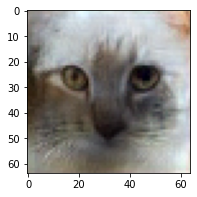

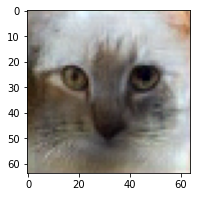

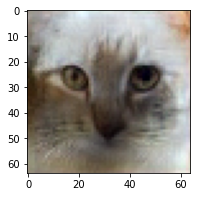

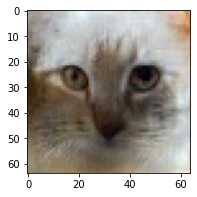

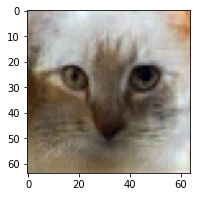

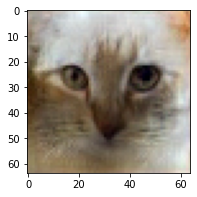

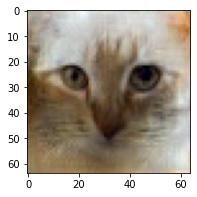

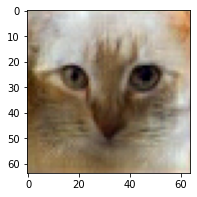

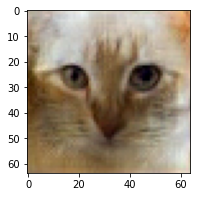

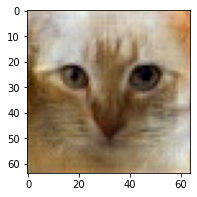

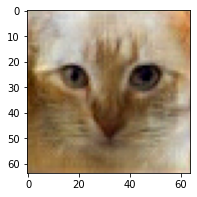

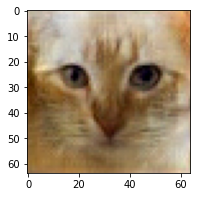

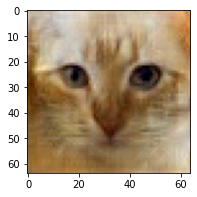

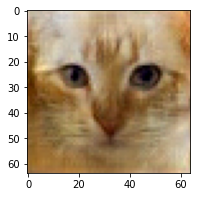

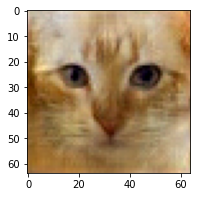

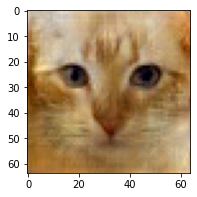

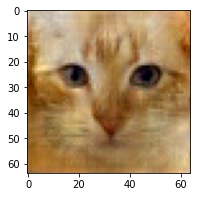

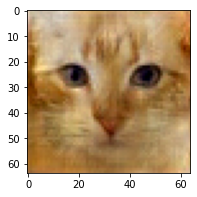

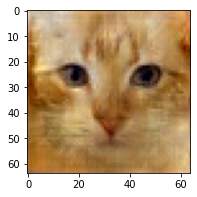

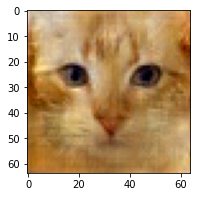

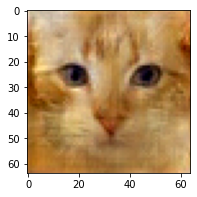

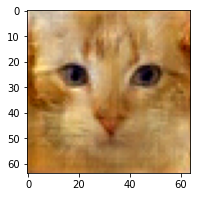

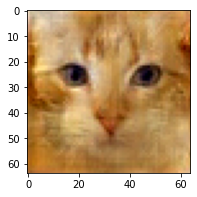

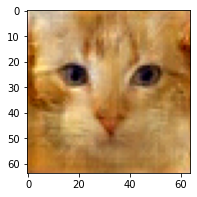

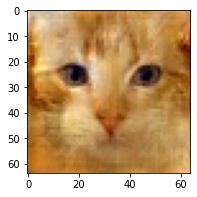

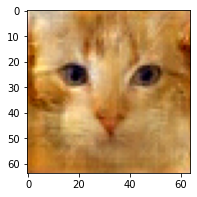

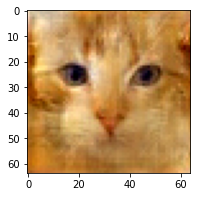

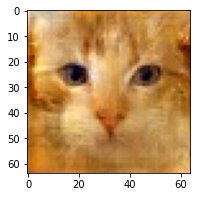

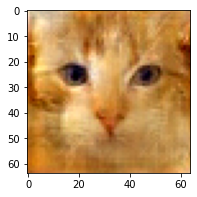

In [27]:
# How many points to interpolate between each data point
points = 60

# Index counter for file name of generated images
count = 0

# For each element in the data_points array
for x in range(len(data_points)-1):
    
    # Interpolate points between the two given data points
    line = interp1d([1, points], np.vstack([data_points[x], data_points[x+1]]), axis=0)
    
    # For each point interpolated
    for i in range(points):
        
        # Generate prediction from interpolated point
        result = np.array(model.predict(line(i+1).reshape(1,512)))
        
        # Reshape data to 64x64x3 RGB image
        result = result.reshape(1,64,64,3)
        result = result * 255
        result = result.astype(int)
        
        # Add generated prediction to figure and save image to save_path
        fig=plt.figure(figsize=(3, 3))
        plt.imshow(result[0])
        fig.add_subplot(1, 1, 1)
        fig.savefig(save_path + "\\image_%d.png" % count)
        count = count + 1